In [ ]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):               0,1
Vulnerability 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -r sample_data

!cp "/content/drive/MyDrive/archive.zip" "/content/" >null
!unzip -n "/content/archive.zip" -d "/content/" >null

!rm null

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import LeakyReLU, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [ ]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale =1./255,
                                 validation_split = 0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                    batch_size = 16,
                                                   subset = 'training')

validation_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 16,
                                                       subset = 'validation')

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")


Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential()
model.add(VGG19(include_top = False,weights = 'imagenet',input_shape= (224,224,3)))
model.add(Flatten())
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5, activation='softmax'))

model.summary()

optimizer = Adam(learning_rate = 0.0001)
model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics = ['accuracy'])
epochs = 25
batch_size = 16

history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator, callbacks=[tensorboard_callback])

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20,149,829
Trainable params: 20,149,829
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
 4/55 [=>............................] - ETA: 40s - loss: 1.6982 - accuracy: 0.2656

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 65s 719ms/step - loss: 1.3728 - accuracy: 0.4099 - val_loss: 0.6090 - val_accuracy: 0.7717
Epoch 2/25
55/55 [==============================] - 32s 578ms/step - loss: 0.8943 - accuracy: 0.6732 - val_loss: 0.4173 - val_accuracy: 0.8587
Epoch 3/25
55/55 [==============================] - 33s 593ms/step - loss: 0.6694 - accuracy: 0.7818 - val_loss: 0.1353 - val_accuracy: 0.9783
Epoch 4/25
55/55 [==============================] - 31s 562ms/step - loss: 0.4467 - accuracy: 0.8545 - val_loss: 0.2269 - val_accuracy: 0.9348
Epoch 5/25
55/55 [==============================] - 31s 567ms/step - loss: 0.4580 - accuracy: 0.8418 - val_loss: 0.0982 - val_accuracy: 0.9783
Epoch 6/25
55/55 [==============================] - 32s 573ms/step - loss: 0.3432 - accuracy: 0.9018 - val_loss: 0.0402 - val_accuracy: 1.0000
Epoch 7/25
55/55 [==============================] - 33s 602ms/step - loss: 0.2868 - accuracy: 0.9018 - val_loss: 0.1247 - val_accuracy: 0.9565
Epoch 8/25

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

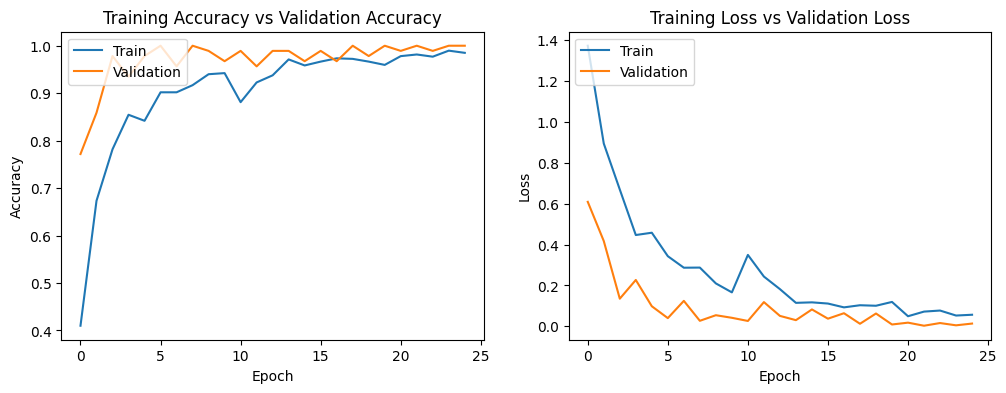

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

 6/55 [==>...........................] - ETA: 19s - loss: 0.0311 - accuracy: 0.9896

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


6/6 [==============================] - 4s 695ms/step - loss: 0.0136 - accuracy: 1.0000
final train accuracy = 98.96 , validation accuracy = 100.00


In [ ]:
model.save('HumanPoseEstimation.h5')

In [ ]:
from PIL import Image
import numpy as np

# Load the image from file
image = Image.open('/content/DATASET/TEST/goddess/00000003.jpg')

# Resize the image to the target size of (224,224)
image_resized = image.resize((224, 224))

# Convert the resized image to an array
image_array = np.array(image_resized)

# Reshape the array to have a batch size of 1
image_array = np.expand_dims(image_array, axis=0)

# Apply any necessary data preprocessing steps
image_array = image_array / 255.0  # normalize pixel values to range [0, 1]

# Pass the preprocessed array to the model to obtain predicted probabilities
predicted_probabilities = model.predict(image_array)

# Convert the predicted probabilities to a class label
predicted_class = np.argmax(predicted_probabilities)

# Print the predicted class label
print("Predicted class:", predicted_class)


1/1 [==============================] - 0s 23ms/step
Predicted class: 1


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/DATASET/TEST/',
    image_size=(224, 224),
    batch_size=batch_size, shuffle=False)

# Make predictions on test dataset
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=1)

# Get true labels for test dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

Found 470 files belonging to 5 classes.
15/15 [==============================] - 9s 587ms/step


In [ ]:
# Calculate precision score
precision = precision_score(y_true, y_pred, average='weighted')
print('Precision score:', precision)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy score:', accuracy)

recall = recall_score(y_true, y_pred, average='weighted')
print('Recall score:', recall)

f1 = f1_score(y_true, y_pred, average='weighted')
print('F1 score:', f1)

Precision score: 0.9643533335421648
Accuracy score: 0.9638297872340426
Recall score: 0.9638297872340426
F1 score: 0.9639796809995048


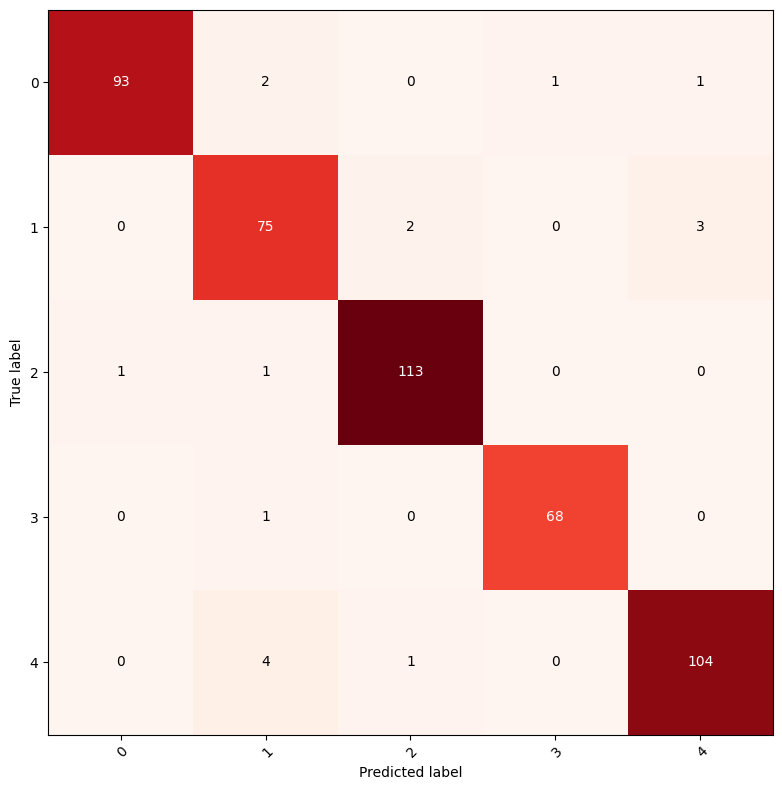

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = ['0', '1', '2', '3', '4']
# Plot confusion matrix as heatmap
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       ylabel='True label',
       xlabel='Predicted label')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")
fig.tight_layout()
plt.show()
